In [5]:
import sympy as sp
import numpy as np

Создайте совокупности sin вида sin(1),sin(2), . . . ,sin(100) и cos вида
cos(1), cos(2), . . . , cos(100).
a) Найдите эмпирическое среднее и эмпирическое стандартное отклонение совокупности sin;
б) Найдите четвертый эмпирический центральный момент и эмпирический эксцесс.
в) Постройте график эмпирической функции распределения совокупности sin.
г) Постройте на одном рисунке графики эмпирических функций распределения совокупностей: sin и cos.
д) Найдите эмпирический коэффициент корреляции признаков sin и cos
на совокупности натуральных чисел от 1 до 100.

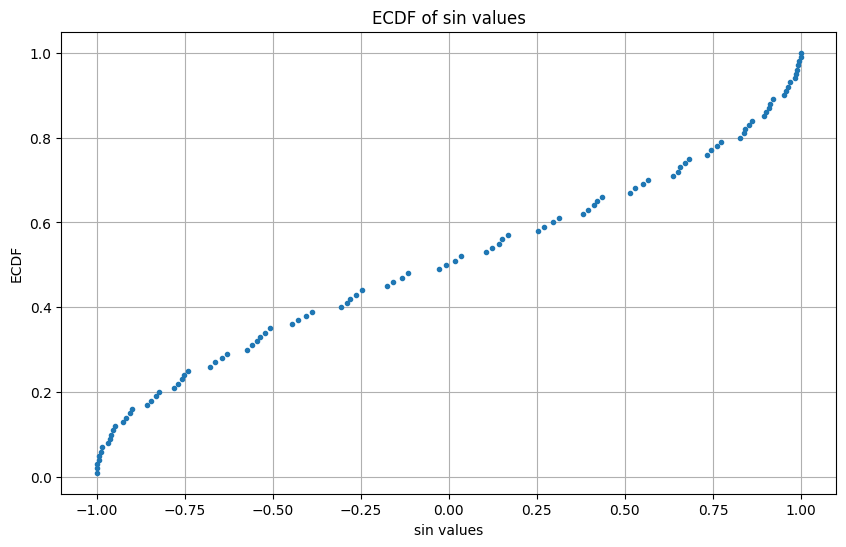

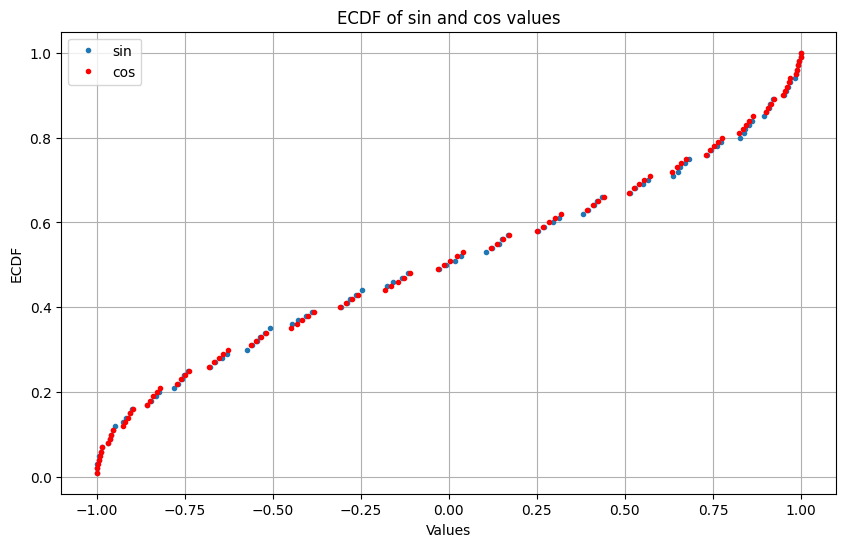

(-0.0012717101366042016,
 0.7090008871157724,
 0.37697988066557236,
 -1.5081297338390791,
 -0.0027337814423635787)

In [6]:


# Создание совокупностей
values = np.arange(1, 101)
sin_values = np.sin(values)
cos_values = np.cos(values)

# a) Эмпирическое среднее и стандартное отклонение для sin
mean_sin = np.mean(sin_values)
std_sin = np.std(sin_values)

# b) Четвертый эмпирический центральный момент и эмпирический эксцесс
fourth_moment = np.mean((sin_values - mean_sin) ** 4)
kurtosis = fourth_moment / std_sin**4 - 3

# c) График эмпирической функции распределения для sin
import matplotlib.pyplot as plt

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

x_sin, y_sin = ecdf(sin_values)

plt.figure(figsize=(10, 6))
plt.plot(x_sin, y_sin, marker='.', linestyle='none')
plt.title("ECDF of sin values")
plt.xlabel("sin values")
plt.ylabel("ECDF")
plt.grid(True)
plt.show()

# г) Графики эмпирических функций распределения для sin и cos на одном рисунке
x_cos, y_cos = ecdf(cos_values)

plt.figure(figsize=(10, 6))
plt.plot(x_sin, y_sin, marker='.', linestyle='none', label='sin')
plt.plot(x_cos, y_cos, marker='.', linestyle='none', color='red', label='cos')
plt.title("ECDF of sin and cos values")
plt.xlabel("Values")
plt.ylabel("ECDF")
plt.legend()
plt.grid(True)
plt.show()

# д) Эмпирический коэффициент корреляции
correlation_coefficient = np.corrcoef(sin_values, cos_values)[0, 1]

mean_sin, std_sin, fourth_moment, kurtosis, correlation_coefficient


Найдите эмпирическую асимметрию совокупности всех простых чисел от
3 до 99991. Найдите эмпирический эксцесс совокупности, полученной из
предыдущей совокупности добавлением чисел со знаком «минус»

In [7]:
# def is_prime(n):
#     """Проверка простоты числа"""
#     if n <= 1:
#         return False
#     if n <= 3:
#         return True
#     if n % 2 == 0 or n % 3 == 0:
#         return False
#     i = 5
#     while i * i <= n:
#         if n % i == 0 or n % (i + 2) == 0:
#             return False
#         i += 6
#     return True

# Находим все простые числа от 3 до 99991
primes = list(sp.primerange(1,99992))

# Вычисляем эмпирическую асимметрию
mean_primes = np.mean(primes)
std_primes = np.std(primes)
skewness = np.mean(((primes - mean_primes) / std_primes) ** 3)

# Создаем новую совокупность, добавляя числа со знаком «минус»
extended_primes = primes + [-i for i in primes]

# Вычисляем эмпирический эксцесс для расширенной совокупности
mean_extended = np.mean(extended_primes)
std_extended = np.std(extended_primes)
fourth_moment_extended = np.mean((extended_primes - mean_extended) ** 4)
kurtosis_extended = fourth_moment_extended / std_extended**4 - 3

skewness, kurtosis_extended


(0.08792271910549009, -1.0924030311382884)

Пусть S – совокупность двузначных простых чисел, а X – тождественный
признак, X(s) = s для каждого s из S. Найдите для признака X следующие виды эмпирических средних: среднее геометрическое (G), среднее
гармоническое (H) и среднее степенное (Q) с показателем 3 (среднее кубическое). Для вычисления средних используйте Python

In [8]:
# Создание совокупности двузначных простых чисел
S = list(sp.primerange(1,99))

# Вычисление средних для признака X
# Среднее геометрическое
G = np.exp(np.mean(np.log(S)))

# Среднее гармоническое
H = len(S) / np.sum(1.0 / np.array(S))

# Среднее степенное (среднее кубическое)
Q = (np.mean(np.power(S, 3)))**(1/3)

G, H, Q


(28.47810698076265, 13.867185195179584, 57.27211631924982)

In [9]:
num_trials = 10000

G5_values = []

for _ in range(num_trials):
    sample = np.random.choice(S, 5, replace=True)
    G5 = np.exp(np.mean(np.log(sample)))
    G5_values.append(G5)

# a) вероятность того, что G5 < G
prob_G5_less_than_G = sum(1 for value in G5_values if value < G) / num_trials

# b) математическое ожидание E(G5)
E_G5 = np.mean(G5_values)

prob_G5_less_than_G, E_G5


(0.4741, 31.54891884803726)

(Продолжение) Для признака X на совокупности S постройте таблицу относительных интервальных частот (в % ). Интервалы группировки:(10; 20),
(20; 30), . . ., (90; 100). Используйте эту таблицу для построения гистограммы.


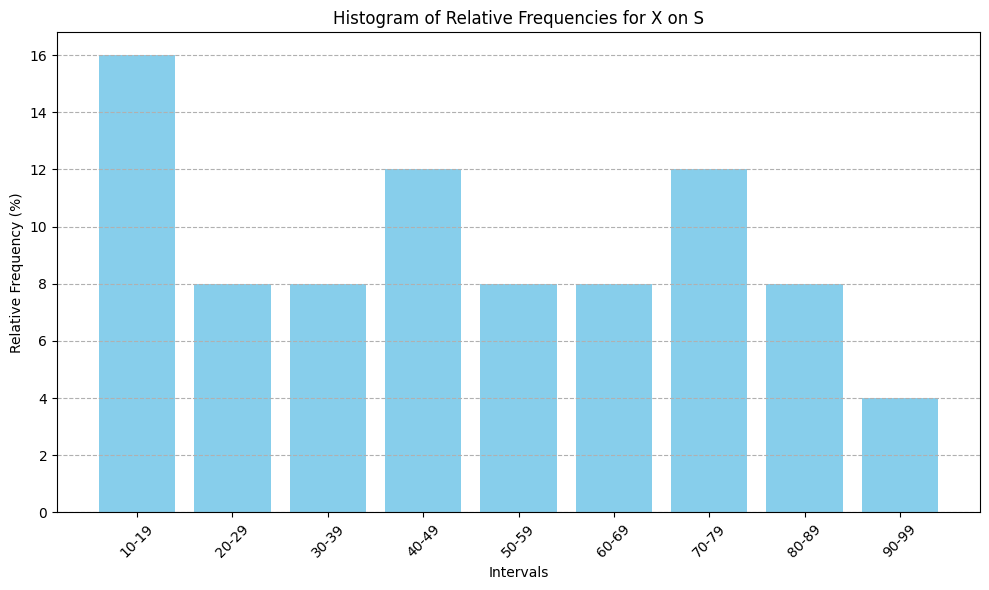

[16.0, 8.0, 8.0, 12.0, 8.0, 8.0, 12.0, 8.0, 4.0]

In [10]:
# Определение интервалов и подсчет элементов в каждом интервале
intervals = [(i, i+10) for i in range(10, 100, 10)]
counts = [sum(1 for s in S if s >= start and s < end) for start, end in intervals]

# Вычисление относительных интервальных частот
relative_frequencies = [count/len(S)*100 for count in counts]

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.bar([f"{start}-{end-1}" for start, end in intervals], relative_frequencies, color='skyblue')
plt.xlabel("Intervals")
plt.ylabel("Relative Frequency (%)")
plt.title("Histogram of Relative Frequencies for X on S")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

relative_frequencies


Теперь займемся моделированием. Эксперимент проводится N раз, каждый из которых состоит в подбрасывании n раз игральной симметричной
кости. Пусть X – выборочное среднее.
a) Построить в блокноте Jupyter Notebook гистограмму плотности относительных частот выборочного среднего X и наложить плотность
нормального закона распределения с подходящими параметрами. Картинка для N = 100000 и n = 1000 примерно такая:

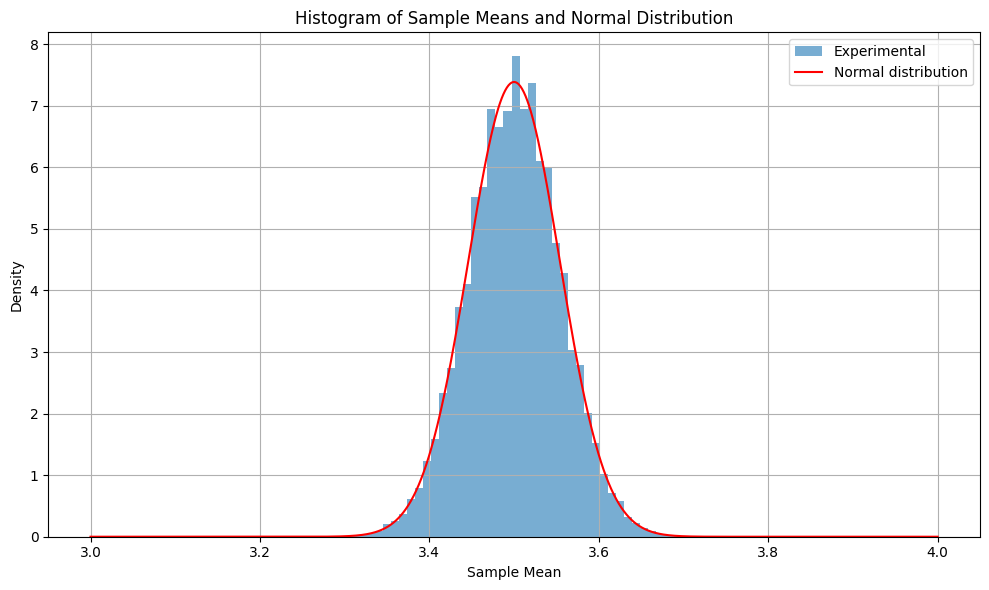

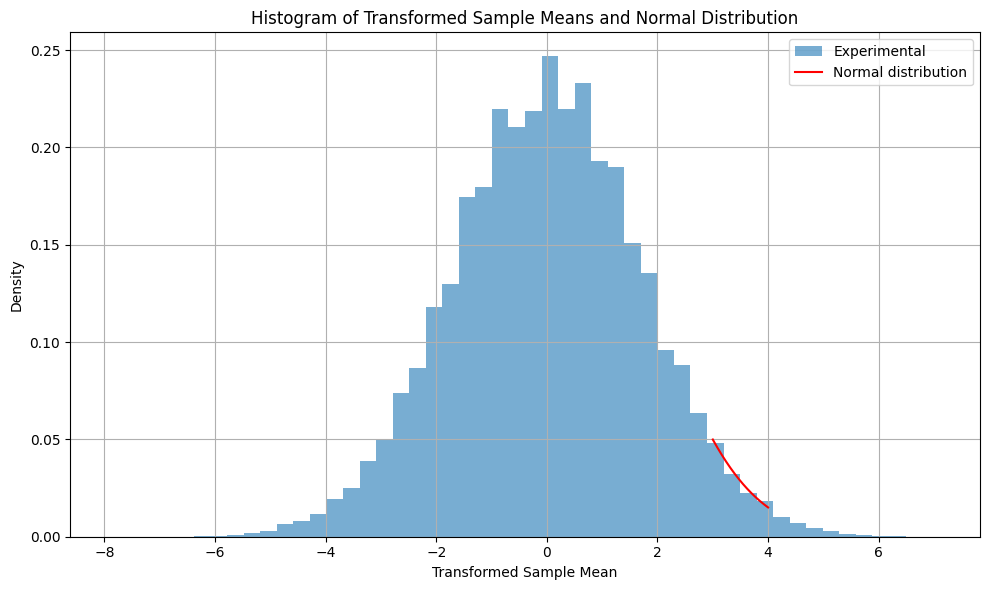

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Количество экспериментов и количество подбрасываний в каждом эксперименте
N = 100000
n = 1000

# Моделирование эксперимента
samples = np.random.choice([1, 2, 3, 4, 5, 6], size=(N, n))
means = samples.mean(axis=1)

# Параметры нормального распределения (ЦПТ)
mean = 3.5  # Среднее значение игральной кости
std = np.sqrt((35/12) / n)  # Стандартное отклонение для выборочного среднего

# Генерация значений нормального распределения
x = np.linspace(3, 4, 1000)
normal_values = norm.pdf(x, mean, std)

# Построение графика
plt.figure(figsize=(10, 6))
plt.hist(means, bins=50, density=True, alpha=0.6, label="Experimental")
plt.plot(x, normal_values, 'r', label="Normal distribution")
plt.title("Histogram of Sample Means and Normal Distribution")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Преобразование выборочного среднего
transformed_means = np.sqrt(n) * (means - 7/2)

# Параметры нормального распределения для преобразованного среднего
mean_transformed = 0  # Из-за вычитания 7/2
std_transformed = np.sqrt(35/12)  # Стандартное отклонение игральной кости

# Генерация значений нормального распределения для преобразованного среднего
normal_values_transformed = norm.pdf(x, mean_transformed, std_transformed)

# Построение графика
plt.figure(figsize=(10, 6))
plt.hist(transformed_means, bins=50, density=True, alpha=0.6, label="Experimental")
plt.plot(x, normal_values_transformed, 'r', label="Normal distribution")
plt.title("Histogram of Transformed Sample Means and Normal Distribution")
plt.xlabel("Transformed Sample Mean")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
